# data analysis + linear regression modelbuilding

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [9]:
import warnings

warnings.filterwarnings('ignore')

lets import data set first

this is basically aboud house price data set

In [3]:
df = pd.read_csv("./minihomeprices.csv")

df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


so this a small and simple data set having 5 row and 4 column

In [4]:
df.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

In [5]:
# size
df.shape

(6, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


so anyway we will be taking all the other features expecpt price and we will give new value and predict price

lets describle the data

In [8]:
df.describe()

,area,bedrooms,age,price
count,6.000000,5.00000,6.000000,6.000000
mean,3416.666667,4.20000,16.500000,648333.333333
std,587.934237,1.30384,8.288546,109117.673484
min,2600.000000,3.00000,8.000000,550000.000000
25%,3050.000000,3.00000,9.750000,572500.000000
50%,3400.000000,4.00000,16.500000,602500.000000
75%,3900.000000,5.00000,19.500000,722500.000000
max,4100.000000,6.00000,30.000000,810000.000000


In [10]:
df.describe().style.background_gradient(cmap='CMRmap')

,area,bedrooms,age,price
count,6.000000,5.000000,6.000000,6.000000
mean,3416.666667,4.200000,16.500000,648333.333333
std,587.934237,1.303840,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.000000,9.750000,572500.000000
50%,3400.000000,4.000000,16.500000,602500.000000
75%,3900.000000,5.000000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


In [12]:
# lets check null value

df.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

1 null value

 lets fill the null value using mean

In [16]:
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())

df.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


so the problem solved

### lets do some data analysis

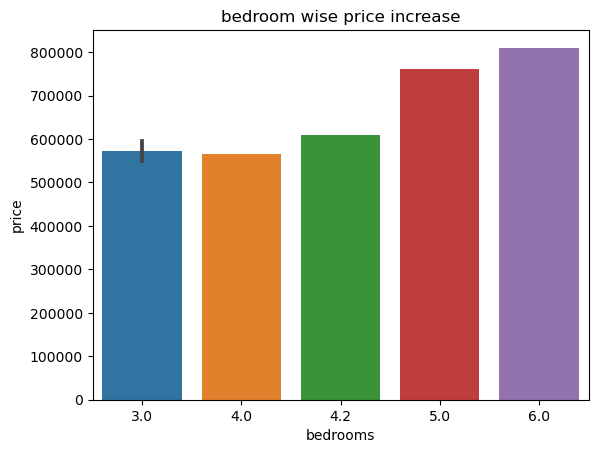

In [20]:
sns.barplot(x=df['bedrooms'], y= df.price)
plt.title("bedroom wise price increase");

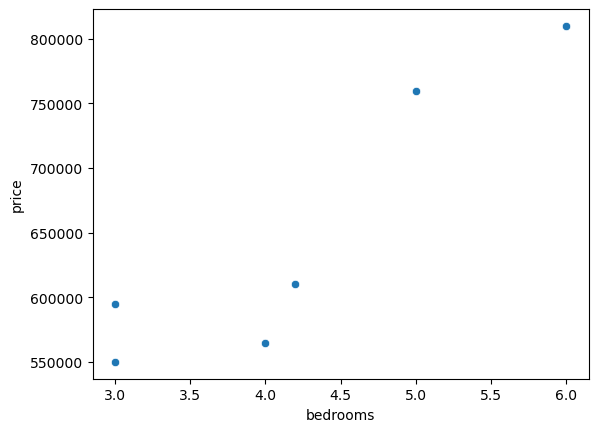

In [22]:
# price vs bedroom sctterplot

sns.scatterplot(x = df.bedrooms, y= df.price);

<AxesSubplot:xlabel='area', ylabel='price'>

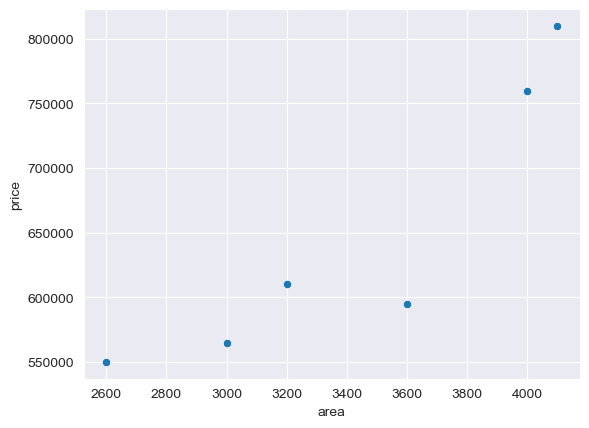

In [24]:
# scattterplot od area vs price

sns.set_style(style='darkgrid')

sns.scatterplot(x = df.area, y= df.price)

Text(0.5, 1.0, 'bedroom vs bedroom lineplot')

<Figure size 1000x700 with 0 Axes>

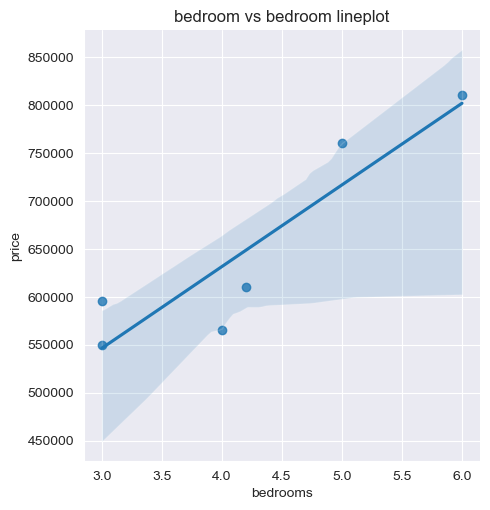

In [31]:
# lets try another lmplot

plt.figure(figsize=(10,7))

sns.lmplot(x='bedrooms', y = 'price', data=df)

plt.title("bedroom vs bedroom lineplot")

# lets go for modeling

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
model = LinearRegression()

In [35]:
X = df.drop(['price'], axis=1)

y = df['price']

In [36]:
df['bedrooms'] = df['bedrooms'].astype('int64')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      6 non-null      int64
 1   bedrooms  6 non-null      int64
 2   age       6 non-null      int64
 3   price     6 non-null      int64
dtypes: int64(4)
memory usage: 320.0 bytes


In [40]:
print(X)

print('-'*25)

print(y)

   area  bedrooms  age
0  2600       3.0   20
1  3000       4.0   15
2  3200       4.2   18
3  3600       3.0   30
4  4000       5.0    8
5  4100       6.0    8
-------------------------
0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64


lets fit the model

In [41]:
model.fit(X,y)

LinearRegression()

In [46]:
model.predict([[4000,2,50]])

array([551989.04870256])

In [47]:
model.coef_

array([  116.66950551, 18756.28806982, -3675.75111708])

In [48]:
model.intercept_

231586.00639409176

In [49]:
score = model.score(X, y)

In [55]:
print(f"{score*100:.2f}")

95.41
